# Exercise 3

In [20]:
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image

In [21]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)

In [22]:
target = housing.target

In [23]:
features = housing.data[["Longitude", "Latitude"]]

In [24]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [25]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

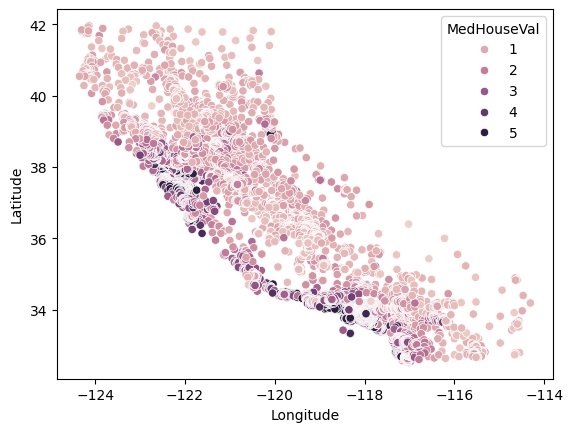

In [26]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [27]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-27-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-27-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [29]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

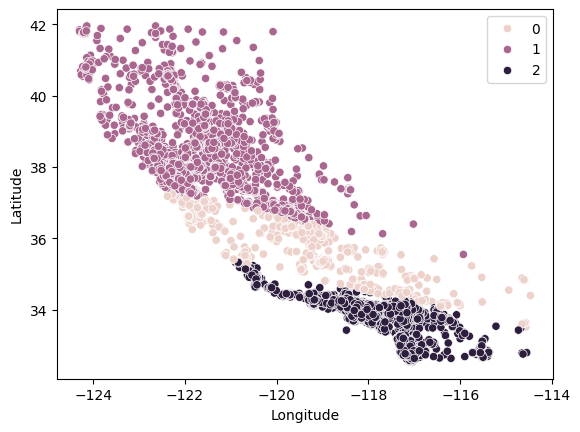

In [31]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

Text(0, 0.5, 'WCSS')

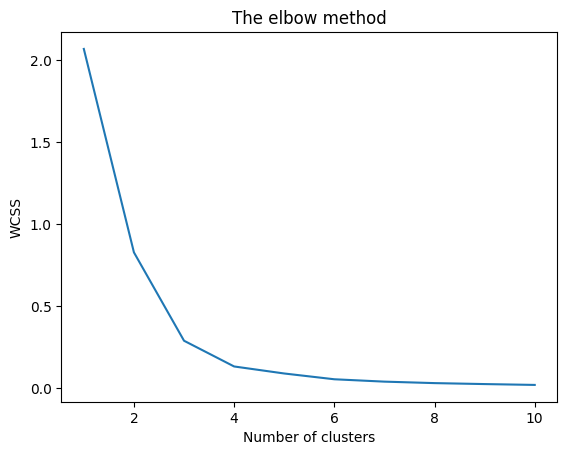

In [33]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [34]:
import numpy as np # Import the numpy library and assign it the alias 'np'

cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(X_train_norm)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True) # Now np is defined and can be used
dict(zip(unique, counts))

[1 2 0 ... 2 2 1]


{0: 5348, 1: 7412, 2: 14897}

In [36]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

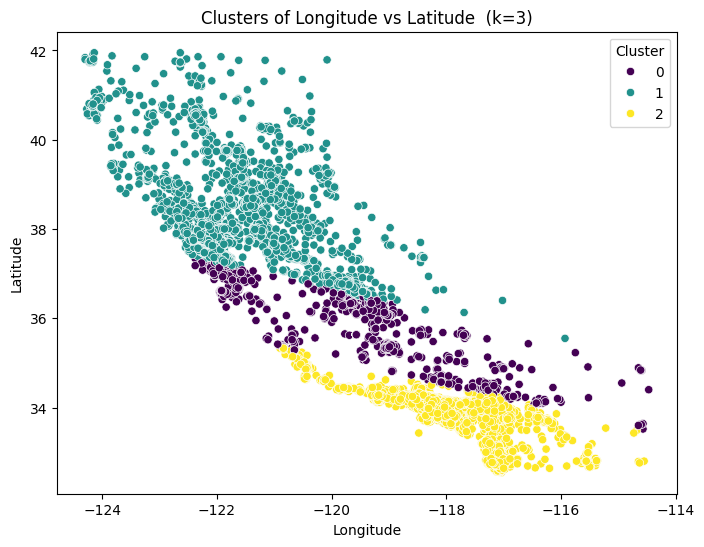

In [38]:
X_train['Cluster'] = kmeans.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_train, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', legend='full')
plt.title(f'Clusters of Longitude vs Latitude  (k={3})')
plt.show()